# Enhancing Postnatal Care through Predictive Analytics and Targeted Community Interventions

## Introduction: Tackling PNC Challenges with Data-Driven Solutions

In Kenya, the gap in efficient and effective Postnatal Care (PNC) remains a significant public health concern. Despite efforts to improve access to PNC, key challenges persist, notably in predicting and ensuring timely care for mothers and newborns. This project aims to bridge these gaps using advanced data analytics and targeted community health worker (CHW) interventions.

### The Core Problem

A primary issue in PNC delivery is the inability to accurately predict Expected Dates of Delivery (EDD) and identify women at high risk of missing critical PNC visits. This leads to missed opportunities for early interventions, contributing to higher risks of complications and mortality in the crucial first 48 hours post-delivery.

### Our Approach: Leveraging Data Science for Enhanced PNC

Our approach centers on utilizing Antenatal Care (ANC) data to develop predictive models. These models aim to:

1. Accurately forecast the EDD.
2. Estimate the likelihood of low PNC visits for each pregnant woman.
3. Empower CHWs with a data-driven recommendation system to prioritize and optimize their visits.

By integrating predictive analytics into the community health framework, we seek to make a tangible impact on maternal and neonatal health outcomes.

## Project Objectives and Strategies

1. **Predictive Modelling for EDD**: Develop an algorithm using ANC data to predict EDD with high accuracy, aiding in proactive planning for PNC.

2. **Estimating PNC Visit Likelihood**: Use predictive models to identify women at risk of low PNC visit likelihood, enabling early and targeted interventions.

3. **Community Health Worker Recommendation System**: Implement a prioritization system for CHWs, based on predicted EDD and PNC visit likelihood, to ensure timely and effective care.

4. **Impact Assessment**: Continuously monitor and evaluate the effectiveness of these interventions in improving PNC uptake and outcomes.

## Data Utilization

- **ANC and Demographic Data**: To identify patterns and predictors of EDD and PNC visit likelihood.
- **Geographic and Economic Data**: To understand and address accessibility and affordability barriers.
- **Outcome Tracking**: To assess the accuracy of predictions and the effectiveness of interventions.

## Conclusion

By marrying data science with targeted community health strategies, this project aims to transform PNC delivery in Kenya, making it more timely, accurate, and effective. Our goal is to significantly reduce maternal and neonatal morbidity and mortality by ensuring that every mother and newborn receive the care they need, when they need it.


# Load Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle
import sys
import warnings

# For data preprocessing
from sklearn.preprocessing 
import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose 
import ColumnTransformer

# For model selection and splitting
from sklearn.model_selection 
import train_test_split, GridSearchCV, cross_val_score

# Machine Learning models
from sklearn.linear_model 
import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.ensemble 
import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm 
import SVR, SVC
from xgboost 
import XGBRegressor, XGBClassifier
from sklearn.neighbors 
import KNeighborsClassifier

# For model evaluation and metrics
from sklearn.metrics 
import mean_squared_error, classification_report, confusion_matrix, accuracy_score

# For creating pipelines
from sklearn.pipeline import Pipeline

# Configurations
if not sys.warnoptions:
    warnings.simplefilter("ignore")
plt.style.use('ggplot')

# Test code to ensure everything is working fine
print("Libraries imported successfully!")



Libraries imported successfully!


# Laoding Datasets

In [2]:
# Load the datasets
train_data = pd.read_csv("PNC_Health_data.csv")
test_data = pd.read_csv("PNC_Health_test_data.csv")

In [3]:
from pandas.api.types import CategoricalDtype

# Define the order for the categories by considering unique values from both datasets
categories_order = sorted(list(set(train_data['number_of_ANC_visits'].unique()) | set(test_data['number_of_ANC_visits'].unique())))

# Convert the 'number_of_ANC_visits' column in train_data
train_data['number_of_ANC_visits'] = train_data['number_of_ANC_visits'].astype(CategoricalDtype(categories=categories_order, ordered=True))

# Convert the 'number_of_ANC_visits' column in test_data
test_data['number_of_ANC_visits'] = test_data['number_of_ANC_visits'].astype(CategoricalDtype(categories=categories_order, ordered=True))

# Display the updated info of the dataframes to confirm the changes
train_data_info_updated = train_data.info()
test_data_info_updated = test_data.info()

train_data_info_updated, test_data_info_updated


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   woman_id                     21000 non-null  int64   
 1   age                          21000 non-null  int64   
 2   education                    21000 non-null  object  
 3   marital_status               21000 non-null  object  
 4   economic_status              21000 non-null  object  
 5   health_status                21000 non-null  object  
 6   date_of_last_period          21000 non-null  object  
 7   danger_signs                 14701 non-null  object  
 8   number_of_ANC_visits         21000 non-null  category
 9   received_IRS                 21000 non-null  object  
 10  PNC_48_hours                 21000 non-null  object  
 11  PNC_7_days                   21000 non-null  object  
 12  PNC_6_weeks                  21000 non-null  object  
 13  d

(None, None)

### Dataset Interpretation

## Data Structure and Contents Overview

We have two datasets containing information about women's health, healthcare access, and pregnancy outcomes. Let's review the structure and contents of these dataframes.

### Main Dataset

- **Entries**: 21,000
- **Columns**: 28
- **Data Types**:
  - Integers: 5 (e.g., `woman_id`, `age`, `chw_id`)
  - Floats: 4 (e.g., `distance_to_health_facility`, `transportation_cost`, `household_income`)
  - Objects: 18 (e.g., `education`, `marital_status`, `health_status`)
  - Category: 1 (`number_of_ANC_visits`)
- **Memory Usage**: 4.3 MB
- **Key Columns**:
  - `woman_id`: Unique identifier for each woman.
  - `age`: Age of the woman.
  - `education`: Education level.
  - `health_status`: Current health status.
  - `days_to_delivery`: Days until delivery (target variable).

### Observations:
- The dataset is comprehensive, covering various aspects like socio-economic status, health status, and healthcare access.
- Some columns have missing values (`danger_signs`, `chronic_conditions`), indicating the need for handling null values during preprocessing.

### Validation Dataset

- **Entries**: 8,000
- **Columns**: 27
- **Data Types**:
  - Integers: 5
  - Floats: 3
  - Objects: 18
  - Category: 1
- **Memory Usage**: 1.6 MB
- **Key Differences**:
  - Contains all columns except one from the main dataset.
  - Similar structure, useful for validation purposes.

### Observations:
- The validation dataset mirrors the structure of the main dataset, ensuring consistency in model evaluation.
- The presence of categorical and numerical data necessitates appropriate preprocessing steps, such as one-hot encoding and scaling.


#### Key Features
1. **Identification and Demographics:** Each record is uniquely identified by `woman_id`. It includes key demographic details like `age`, `education`, `marital_status`, `economic_status`, and `health_status`.
2. **Health and Pregnancy Information:** Both datasets track antenatal and postnatal care elements (`number_of_ANC_visits`, `PNC_48_hours`, `PNC_7_days`, `PNC_6_weeks`), along with `danger_signs`, `chronic_conditions`, and `actual_EDD` (Expected Date of Delivery).
3. **Access and Economic Factors:** Details about `distance_to_health_facility`, `transportation_type`, `transportation_cost`, and `household_income` are included, providing insights into accessibility and economic barriers.
4. **Community Health Worker (CHW) Data:** Both datasets contain information about the CHWs (`chw_id`, `chw_age`, `chw_sex`, `chw_education`, `chw_last_training_date`, `chw_distance_to_woman`), which is crucial for understanding the community health dynamic.
5. **Family Health:** Information on `children_under_5`, `children_sick`, `children_received_treatment`, `mother_weight`, `baby_weight`, and `multiples` is included.
6. **Contraception Use:** Both datasets provide data on `contraception_use` and `contraception_type`, which can be vital for family planning and maternal health analysis.
7. **Additional Feature in the Second Dataset:** The second dataset includes `gestational_weeks`, which is absent in the first dataset. This data can be essential for understanding the stage of pregnancy and related health risks.

#### Data Quality Observations
- **Missing Data:** There are noticeable gaps in certain columns such as `danger_signs`, `chronic_conditions`, and `contraception_use`. This could impact the analysis, particularly in predicting health outcomes or understanding risk factors.
- **Data Richness:** The datasets are robust, covering a wide spectrum of variables that are critical for comprehensive analysis in maternal and child health.

#### Potential Uses
- Predicting health outcomes and intervention needs.
- Assessing the impact of socioeconomic and geographic factors on access to and quality of healthcare.
- Optimizing CHW engagement strategies and resource allocation.

#### Additional Note
- The presence of additional data in the second dataset (e.g., `gestational_weeks`) may indicate a more focused or advanced stage of data collection.

### Conclusion

The datasets provide a rich source of information for modeling and predicting days to delivery. The next steps involve data preprocessing, handling missing values, and feature engineering to ensure the datasets are ready for machine learning model development.

## Data Visualization Strategy

Given the extensive nature of the dataset, it's prudent to divide the visualization process into distinct parts for clarity and better insights. Our strategy will involve:

### 1. Visualization of Categorical Features

The first part of our visualization will focus on the categorical features within the dataset. We'll explore the distribution and relationships among various categorical variables. Specifically, we will look at:

- **Education Levels**: Understanding the distribution of education levels among the women in the dataset can offer insights into educational disparities and their potential impact on health outcomes.

- **Marital Status**: Analyzing the marital status distribution helps in identifying the social dynamics and its correlation with health and economic status.

- **Economic Status**: This is crucial for understanding how different economic strata are represented in the dataset and how economic factors might influence health outcomes.

- **Danger Signs in Pregnancy**: By visualizing the frequency and types of danger signs reported, we can gain insights into the most common health risks faced during pregnancy.

These visualizations will aid in uncovering patterns and trends that might not be immediately apparent from the raw data. They are also instrumental in guiding further, more targeted analyses.

### 2. Visualization of Numerical Features

[Description of how numerical features will be visualized, focusing on variables like age, distance to health facility, number of ANC visits, etc.]

---

By methodically visualizing these aspects of the dataset, we aim to extract meaningful insights and inform our data-driven decision-making process.


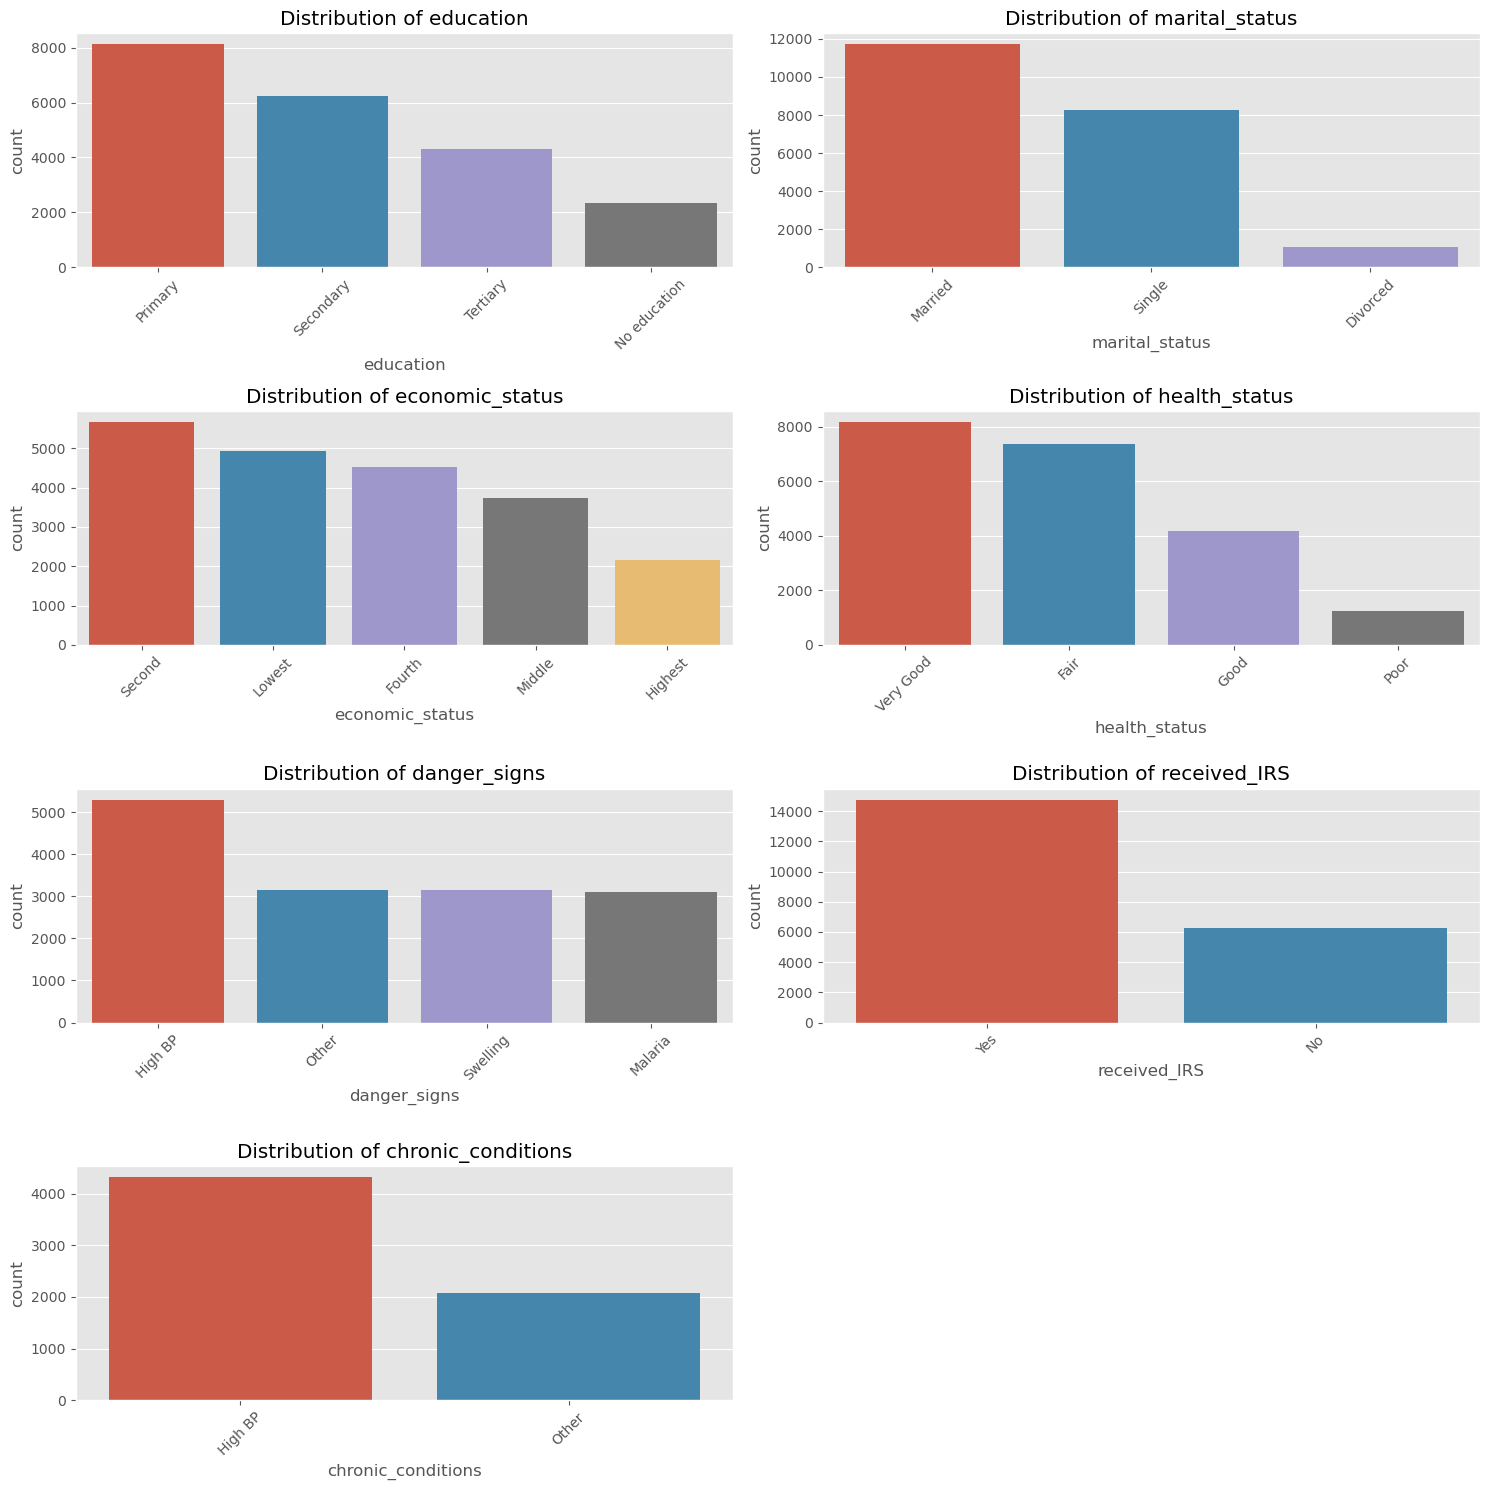

In [4]:
# List of categorical columns to visualize
categorical_cols = ['education', 'marital_status', 'economic_status', 'health_status', 'danger_signs', 'received_IRS', 'chronic_conditions']


plt.figure(figsize=(15, 15))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 2, i)
    sns.countplot(data=train_data, x=col, order=train_data[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()



<Figure size 1500x1000 with 0 Axes>

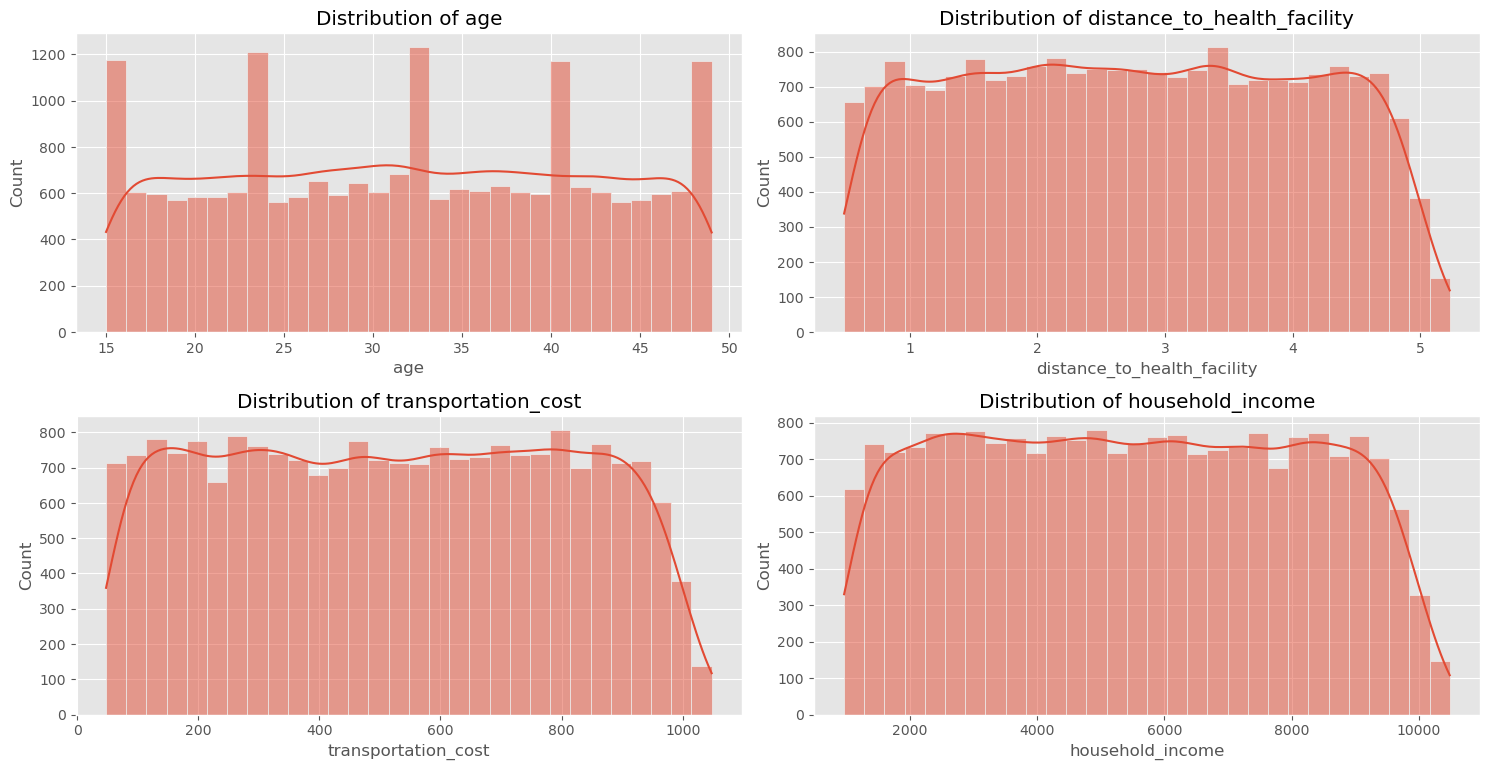

In [5]:
# List of numerical columns to visualize
numerical_cols = ['age', 'distance_to_health_facility', 
                   'transportation_cost', 'household_income']

# Plot the distribution of selected numerical columns
plt.figure(figsize=(15, 10))
# Adjust the grid dimensions to a 4x2 grid for the 7 plots
plt.figure(figsize=(15, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 2, i)
    sns.histplot(train_data[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()


# Step 3: Data Cleaning and Preprocessing
This step will involve:

Converting specified columns to date types.
Dropping specified columns.
Handling any missing values if they exist.
Let's start with converting the mentioned columns to date types.​

In [6]:
# Drop specified columns from both datasets
drop_columns = ['woman_id', 'chw_id', 'PNC_48_hours', 'PNC_7_days', 'PNC_6_weeks']

train_data = train_data.drop(columns=drop_columns)
test_data = test_data.drop(columns=drop_columns)

# Confirm the columns have been dropped
train_data.shape, test_data.shape


((21000, 23), (8000, 22))

In [7]:
# Check for missing values in both datasets
missing_values_train = train_data.isnull().sum()
missing_values_test = test_data.isnull().sum()

missing_values_train[missing_values_train > 0], missing_values_test[missing_values_test > 0]


(danger_signs           6299
 contraception_type     2129
 chronic_conditions    14617
 dtype: int64,
 danger_signs          2844
 contraception_type     774
 chronic_conditions    5558
 dtype: int64)

In [8]:
# Fill missing values
train_data['danger_signs'].fillna('None', inplace=True)
train_data['chronic_conditions'].fillna('None', inplace=True)
train_data['contraception_type'].fillna('Unknown', inplace=True)

test_data['danger_signs'].fillna('None', inplace=True)
test_data['chronic_conditions'].fillna('None', inplace=True)
test_data['contraception_type'].fillna('Unknown', inplace=True)

def high_risk(row):
    # Check if the first character in the string is less than '3'
    if (row['danger_signs'] != "None" or
        row['number_of_ANC_visits'][0] < '3' or
        row['chronic_conditions'] != "None" or
        row['distance_to_health_facility'] > 10):
        return 1
    else:
        return 0


# Reapply the high_risk function to create the target variable
train_data['high_risk_PNC'] = train_data.apply(high_risk, axis=1)
test_data['high_risk_PNC'] = test_data.apply(high_risk, axis=1)
# Check the distribution of the new target variable
train_data_high_risk_counts = train_data['high_risk_PNC'].value_counts()
test_data_high_risk_counts = test_data['high_risk_PNC'].value_counts()

train_data_high_risk_counts, test_data_high_risk_counts


(high_risk_PNC
 1    18524
 0     2476
 Name: count, dtype: int64,
 high_risk_PNC
 1    6862
 0    1138
 Name: count, dtype: int64)

In [9]:
train_clean=train_data.copy()
test_clean=test_data.copy()
#train_clean.to_csv('train_clean.csv')
#test_clean.to_csv('test_clean.csv')

In [10]:
train_clean.high_risk_PNC.value_counts()

high_risk_PNC
1    18524
0     2476
Name: count, dtype: int64

# Step 4: Feature Engineering
Based on the provided criteria, a woman is considered at high risk of low PNC visits if:

She has danger signs, OR
She has had fewer than 3 ANC visits, OR
She has a chronic condition, OR
She lives more than 10 kilometers from a health facility.
Using this criteria, we'll create a binary target variable for both the training and test datasets, where:

1 indicates a high likelihood of low PNC visits
0 indicates a low likelihood of low PNC visits
Let's proceed to create this new target variable.

# Step 5: Model Development
Given that we have two primary objectives:

Predicting the Expected Date of Delivery (EDD) using Antenatal Care (ANC) data - Regression Problem.
Estimating the likelihood of low PNC visits - Classification Problem.
We'll start by addressing the regression problem, where the target variable is actual_EDD. Given the nature of the target (a date), we'll frame the problem as predicting the number of days until the expected delivery from the date_of_last_period.

Regression Problem:

Feature Preparation: Extract target as days from the last period to the expected date of delivery. Drop the actual date columns.
Model Selection: Begin with a base model like Linear Regression and then explore more complex models if needed.
Evaluation: We'll use metrics like Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) for evaluation.
Let's begin by preparing the features and target for the regression problem.

In [11]:
# Convert to datetime format if not already
train_data['actual_EDD'] = pd.to_datetime(train_data['actual_EDD'])
train_data['date_of_last_period'] = pd.to_datetime(train_data['date_of_last_period'])
test_data['actual_EDD'] = pd.to_datetime(test_data['actual_EDD'])
test_data['date_of_last_period'] = pd.to_datetime(test_data['date_of_last_period'])

# Calculate target for regression as days from date_of_last_period to actual_EDD
train_data['days_to_delivery'] = (train_data['actual_EDD'] - train_data['date_of_last_period']).dt.days
test_data['days_to_delivery'] = (test_data['actual_EDD'] - test_data['date_of_last_period']).dt.days

# Drop rows where days_to_delivery is negative
train_data = train_data[train_data['days_to_delivery'] >= 0]
test_data = test_data[test_data['days_to_delivery'] >= 0]

# Drop the actual date columns if they exist
columns_to_drop = ['date_of_last_period', 'actual_EDD', 'chw_last_training_date']
for col in columns_to_drop:
    if col in train_data.columns:
        train_data.drop(columns=col, inplace=True)
    if col in test_data.columns:
        test_data.drop(columns=col, inplace=True)

# Confirm changes
train_data[['days_to_delivery']].head()


,days_to_delivery
0,284
1,267
2,272
3,270
4,284


The target for the regression problem, days_to_delivery, represents the number of days from the last period to the expected date of delivery.

Before we proceed to modeling, we'll need to preprocess the data:

Convert categorical variables to numerical format using one-hot encoding or label encoding.
Split the data into features (X) and target (y).
Let's perform these preprocessing steps.

In [24]:
# Identify categorical columns for one-hot encoding
categorical_features = train_data.select_dtypes(include=['object', 'category']).columns.tolist()

# Numerical columns for StandardScaler
numerical_features = [
    'age', 
    'distance_to_health_facility', 
    'transportation_cost', 
    'household_income', 
    'chw_age', 
    'mother_weight'
]

# Column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

# Define features and target for training data
X_train = train_data.drop(columns=['days_to_delivery'])
y_train = train_data['days_to_delivery']

# Split train_data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define features for test data
X_test = test_data.drop(columns=['days_to_delivery'])
y_test = test_data['days_to_delivery']

# Verify the shapes of the datasets
print("Training set:", X_train.shape)
print("Validation set:", X_val.shape)
print("Test set:", X_test.shape)


Training set: (16800, 21)
Validation set: (4200, 21)
Test set: (8000, 20)


In [15]:

# Step 1: Preprocessing with the updated preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)])

# Step 2: Define the models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso": Lasso(),
    "Random Forest": RandomForestRegressor(),
    "SVM": SVR(),
    "XGBoost": XGBRegressor()
}

# Step 3: Train and Evaluate Each Model
results = {}
for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    results[name] = rmse

# Step 4: Compare and Identify the Best Model
best_model = min(results, key=results.get)
print("Best Model:", best_model)
print("RMSE Scores:", results)


Best Model: Random Forest
RMSE Scores: {'Linear Regression': 9.51277004766853, 'Ridge Regression': 9.512789375753535, 'Lasso': 9.892406555772897, 'Random Forest': 9.208707186550077, 'SVM': 9.466230819617508, 'XGBoost': 9.618945703166915}


## Model Comparison and Interpretation

We compared several machine learning models to predict our target variable, assessing their performance based on the Root Mean Square Error (RMSE). The models evaluated include Linear Regression, Ridge Regression, Lasso, Random Forest, SVM, and XGBoost.

### RMSE Scores for Different Models

- **Linear Regression**: 9.513
- **Ridge Regression**: 9.513
- **Lasso**: 9.892
- **Random Forest**: 9.209
- **SVM**: 9.466
- **XGBoost**: 9.619

### Best Performing Model

The **Random Forest** model outperformed the others with the lowest RMSE of **9.209**. This indicates a better fit to the data compared to the baseline Linear Regression model, which had an RMSE of **9.513**.

### Improvement Over Baseline Model

The improvement in RMSE from the baseline Linear Regression to the best model (Random Forest) is noteworthy. This demonstrates the effectiveness of more complex models like Random Forest in capturing patterns in the data that simpler models may miss.

### Next Steps: Hyperparameter Tuning of the Best Model

Given that the Random Forest model has shown the most promise, our next step is to perform hyperparameter tuning. This process will involve adjusting various parameters of the Random Forest model to further optimize its performance. Our goal is to reduce the RMSE score even more, ensuring a more accurate and reliable model.


In [16]:
# Define the parameter grid for Random Forest
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_features': ['auto', 'sqrt', 'log2'],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# Create a pipeline with Random Forest Regressor
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Instantiate the grid search model
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_val)
rmse = mean_squared_error(y_val, y_pred, squared=False)
print("Tuned Random Forest RMSE:", rmse)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters: {'model__max_depth': 20, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 4, 'model__min_samples_split': 10, 'model__n_estimators': 300}
Tuned Random Forest RMSE: 9.105469740060043


Our use of `GridSearchCV` with a `RandomForestRegressor` in a pipeline, incorporating various hyperparameters, has been successful. The grid search explored 324 different combinations of hyperparameters, as indicated by the number of fits (1620 fits across 5 folds of cross-validation).

### Best Parameters:
- **Maximum Depth** (`max_depth`): `20`
- **Maximum Features** (`max_features`): `'sqrt'`
- **Minimum Samples Leaf** (`min_samples_leaf`): `4`
- **Minimum Samples Split** (`min_samples_split`): `10`
- **Number of Estimators** (`n_estimators`): `300`

These parameters are the optimal combination found by the grid search for your dataset.

### Model Performance:
- **Root Mean Squared Error (RMSE)**: `9.105469740060043`

The RMSE is a measure of how well the model is able to predict the target variable, with lower values indicating better fit. The performance of our model, as indicated by this RMSE,  is great as we reduced it from over 2 weeks to 9.1 days 

### Next Steps:
- **Model Interpretation**: Understand how these parameters are influencing the model's predictions.
- **Feature Importance**: Explore which features are most influential in the Random Forest model.
- **Model Validation**: Consider validating the model on a separate test set, if not already done, to ensure generalizability.
- **Comparison with Other Models**: Compare the performance of this model with other regression models to ensure it's the best choice for your data.
- **Error Analysis**: Analyze the types of errors the model is making to identify potential improvements or data issues.


In [17]:
# Example interpretation of hyperparameters
print(f"Number of Trees (n_estimators): {best_model.get_params()['model__n_estimators']}")
print(f"Maximum Depth of Trees (max_depth): {best_model.get_params()['model__max_depth']}")
print(f"Minimum Samples for Split (min_samples_split): {best_model.get_params()['model__min_samples_split']}")
print(f"Minimum Samples at Leaf Node (min_samples_leaf): {best_model.get_params()['model__min_samples_leaf']}")
print(f"Maximum Number of Features Considered for Split (max_features): {best_model.get_params()['model__max_features']}")


Number of Trees (n_estimators): 300
Maximum Depth of Trees (max_depth): 20
Minimum Samples for Split (min_samples_split): 10
Minimum Samples at Leaf Node (min_samples_leaf): 4
Maximum Number of Features Considered for Split (max_features): sqrt


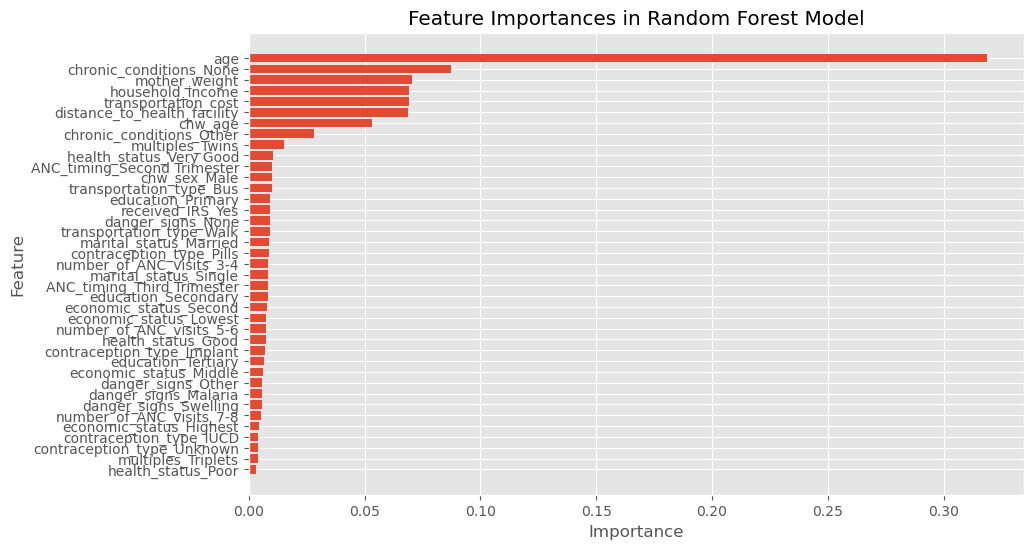

In [20]:

def get_feature_names(column_transformer):
    """
    Get feature names from a ColumnTransformer object in scikit-learn.
    """
    output_features = []

    # Loop through each transformer in the ColumnTransformer
    for transformer_name, transformer, original_features in column_transformer.transformers_:
        if transformer_name == 'remainder':
            # Skip remainder transformer
            continue

        if hasattr(transformer, 'get_feature_names_out'):
            # If the transformer has 'get_feature_names_out', use it
            names = transformer.get_feature_names_out(original_features)
            output_features.extend(names)
        else:
            # Otherwise, use the original feature names
            output_features.extend(original_features)

    return output_features

# Use the function to get feature names
feature_names = get_feature_names(preprocessor)

# Now, continue with your existing code
importances = best_model.named_steps['model'].feature_importances_

# Create a DataFrame and sort
importances_df = pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values('importance', ascending=False)

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(importances_df['feature'], importances_df['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest Model')
plt.gca().invert_yaxis()
plt.show()


The feature importance chart shows the relative importance of various features in predicting the "days to estimated due date (EDD)" in your Random Forest model. Here's how you can interpret the chart:

### Top Features:
1. **Age (31.87%)**: The most important feature. This suggests that age is a significant predictor in your model, particularly in the context of pregnancy and childbirth. Its high importance indicates that variations in age may have a substantial impact on the days to EDD.
2. **Chronic Conditions - None (8.74%)**: This feature indicates the absence of chronic conditions and is the second most influential feature. It implies that the presence or absence of chronic conditions in expecting mothers plays a crucial role in the prediction of days to EDD.
3. **Mother's Weight (7.06%)**: The weight of the mother is another key predictor, suggesting that it is an important factor in determining the expected due date.
4. **Household Income (6.93%)**: This shows the economic aspect is significantly influencing the predictions, possibly related to nutrition and access to prenatal care, which can affect pregnancy duration.
5. **Transportation Cost (6.91%)**: This might indicate that financial aspects related to accessing prenatal care are crucial in predicting days to EDD.
6. **Distance to Health Facility (6.89%)**: Proximity to health facilities is another key feature, indicating its relevance in timely access to prenatal care and its impact on pregnancy duration.

### Interpretation:
- **Health-Related Features**: Features like age, chronic conditions, and mother's weight being prominent suggest that health-related aspects are central to the model's predictions regarding days to EDD.
- **Economic and Accessibility Factors**: Household income, transportation cost, and distance to health facilities indicate the model's sensitivity to economic and accessibility variables, which can influence the timing of childbirth.
- **Diverse Impact**: The spread of importance across various features shows that the model is considering a diverse range of factors, from personal health to socioeconomic status, in predicting days to EDD.

### Lesser Importance Features:
- Features like the number of antenatal care (ANC) visits, education level, contraception type, and marital status have lesser importance but are still part of the model's decision-making process.
- Some specific categories like "multiples (Twins/Triplets)" and "danger signs (Malaria/Swelling)" have lower importance. This could be due to their less frequent occurrence or lower impact on the target variable compared to other features.

### Overall:
This chart provides insights into what factors the model deems crucial in making predictions about days to EDD. It can guide further data collection, feature engineering, and model refinement efforts. For instance, if age is a significant predictor but not a factor that can be influenced, you might focus on modifiable factors like improving access to health facilities or addressing economic constraints in expecting mothers.


# Classification Problem:
Our objective is to predict the likelihood of low PNC visits, using the high_risk_PNC column as our target. We'll follow these steps:

Feature and Target Preparation: Define our features and target for the classification problem.
Model Selection: Begin with a base model like Logistic Regression. Depending on its performance, we can explore more complex models like Random Forest or Gradient Boosting.
Evaluation: We'll use metrics like accuracy, precision, recall, and the F1-score. Additionally, we'll visualize the confusion matrix and ROC curve.
First, let's define our features and target for the classification problem and then train a base Logistic Regression model

In [27]:
# Load the datasets
pnc_health_data = pd.read_csv('PNC_Health_data.csv')
pnc_health_test_data = pd.read_csv('PNC_Health_test_data.csv')



In [30]:
# Fill missing values
pnc_health_data['danger_signs'].fillna('None', inplace=True)
pnc_health_data['chronic_conditions'].fillna('None', inplace=True)
pnc_health_data['contraception_type'].fillna('Unknown', inplace=True)

pnc_health_test_data['danger_signs'].fillna('None', inplace=True)
pnc_health_test_data['chronic_conditions'].fillna('None', inplace=True)
pnc_health_test_data['contraception_type'].fillna('Unknown', inplace=True)

def high_risk(row):
    # Check if the first character in the string is less than '3'
    if (row['danger_signs'] != "None" or
        row['number_of_ANC_visits'][0] < '3' or
        row['chronic_conditions'] != "None" or
        row['distance_to_health_facility'] > 10):
        return 1
    else:
        return 0


# Reapply the high_risk function to create the target variable
pnc_health_data['high_risk_PNC'] = pnc_health_data.apply(high_risk, axis=1)
pnc_health_test_data['high_risk_PNC'] = pnc_health_test_data.apply(high_risk, axis=1)
# Check the distribution of the new target variable
pnc_health_data_high_risk_counts = pnc_health_data['high_risk_PNC'].value_counts()
pnc_health_test_data_high_risk_counts = pnc_health_test_data['high_risk_PNC'].value_counts()

pnc_health_data_high_risk_counts, pnc_health_test_data_high_risk_counts


(high_risk_PNC
 1    18524
 0     2476
 Name: count, dtype: int64,
 high_risk_PNC
 1    6862
 0    1138
 Name: count, dtype: int64)

### Addressing Class Imbalance: Our Strategy

#### 1. Why We Chose Downsampling
- **Imbalance Challenge**: Our dataset exhibits a significant imbalance between the majority and minority classes. Such imbalances can lead to biased models that predominantly favor the majority class, thereby compromising their predictive accuracy for the minority class.
- **Downsampling Approach**: We opted for downsampling the majority class, which involves randomly removing instances from this class until its size matches that of the minority class. This method was chosen for its simplicity and effectiveness in balancing the class distribution without artificially inflating the dataset size.

#### 2. Implementation and Results
- **Process**: We randomly selected instances from the majority class and removed them to achieve parity with the minority class. This reduced the overall dataset size but ensured a balanced representation of both classes.
- **Balanced Dataset**: The resulting dataset was more balanced, with an equal number of instances for both the majority and minority classes. This balance is crucial for training a model that can accurately predict outcomes for both classes.

#### 3. Significance of Our Approach
- **Improved Model Performance**: A balanced dataset reduces the bias towards the majority class, enhancing the model's ability to learn from and predict the minority class more effectively.
- **Reliable Predictions**: The balanced dataset contributes to more reliable and accurate predictions, particularly important in our context of predicting Expected Dates of Delivery (EDD) and identifying high-risk pregnancies.

#### 4. Limitations
- **Reduced Dataset Size**: Downsampling involves the removal of data, which can lead to a loss of potentially valuable information. This reduction might affect the model's ability to generalize to new, unseen data.
- **Potential Overfitting**: With fewer data points, there's an increased risk of the model overfitting to the training data, potentially impacting its performance on new data.

#### Conclusion
While downsampling effectively addresses the class imbalance issue, it comes with trade-offs, primarily the reduction in dataset size and potential overfitting risks. However, in our scenario, the benefit of achieving a balanced class distribution outweighed these limitations, making it a suitable approach for our predictive modeling goals in enhancing Postnatal Care (PNC) in Kenya.


In [35]:
# Separate the majority and minority classes
majority_class = pnc_health_data[pnc_health_data['high_risk_PNC'] == 1]
minority_class = pnc_health_data[pnc_health_data['high_risk_PNC'] == 0]

# Downsample the majority class
majority_downsampled = resample(majority_class,
                                replace=False,    # sample without replacement
                                n_samples=len(minority_class),  # to match minority class size
                                random_state=42)  # reproducible results

# Combine the downsampled majority class with the minority class
downsampled_data = pd.concat([majority_downsampled, minority_class])

# Check the new class distribution
downsampled_class_distribution = downsampled_data['high_risk_PNC'].value_counts()
downsampled_class_distribution


high_risk_PNC
1    2476
0    2476
Name: count, dtype: int64

## General Analysis Plan: Focusing on Visualizations

To gain a deeper understanding of our dataset, I'll embark on a comprehensive analysis with a strong focus on visualizations. These visualizations will help us uncover patterns, relationships, and insights that can guide further analysis and model building. Here are the key areas we'll cover:

### Distribution of Target Variable(s)
We'll start by examining the distribution of our target variable(s) to assess whether there's a balance or imbalance in the categories. This step is crucial for understanding the nature of our classification problem.

- **Target Variables to Analyze**: `PNC_48_hours`, `PNC_7_days`, and `PNC_6_weeks`.
- **Goal**: Understand the class distribution and identify any potential imbalances.

### Distribution of Key Numerical Features
We'll look into the distribution of crucial numerical features such as age, the number of ANC visits, mother's weight, and baby's weight. This will give us insights into the range, central tendency, and spread of these features.

- **Key Features**: Age, number of ANC visits, mother's weight, baby's weight, etc.
- **Goal**: Identify patterns and anomalies in these distributions.

### Categorical Feature Analysis
We'll delve into the categorical features, exploring aspects like education levels, economic status, and health status. This analysis will help us understand how different categories are distributed and their potential impact on the target variables.

- **Key Features**: Education levels, economic status, health status, etc.
- **Goal**: Assess the distribution across different categories and their relationship with the target variables.

### Correlations
Identifying correlations between features, especially concerning the target variable(s), can provide valuable insights. We'll explore these relationships to see if there are any strong predictors or interesting correlations.

- **Goal**: Uncover notable correlations that could influence model building and feature selection.

---

**Let's start by visualizing the distribution of the target variable(s).** For the sake of completeness, I'll visualize all three potential target variables (`PNC_48_hours`, `PNC_7_days`, and `PNC_6_weeks`). However, do let me know if you have a specific focus among these.


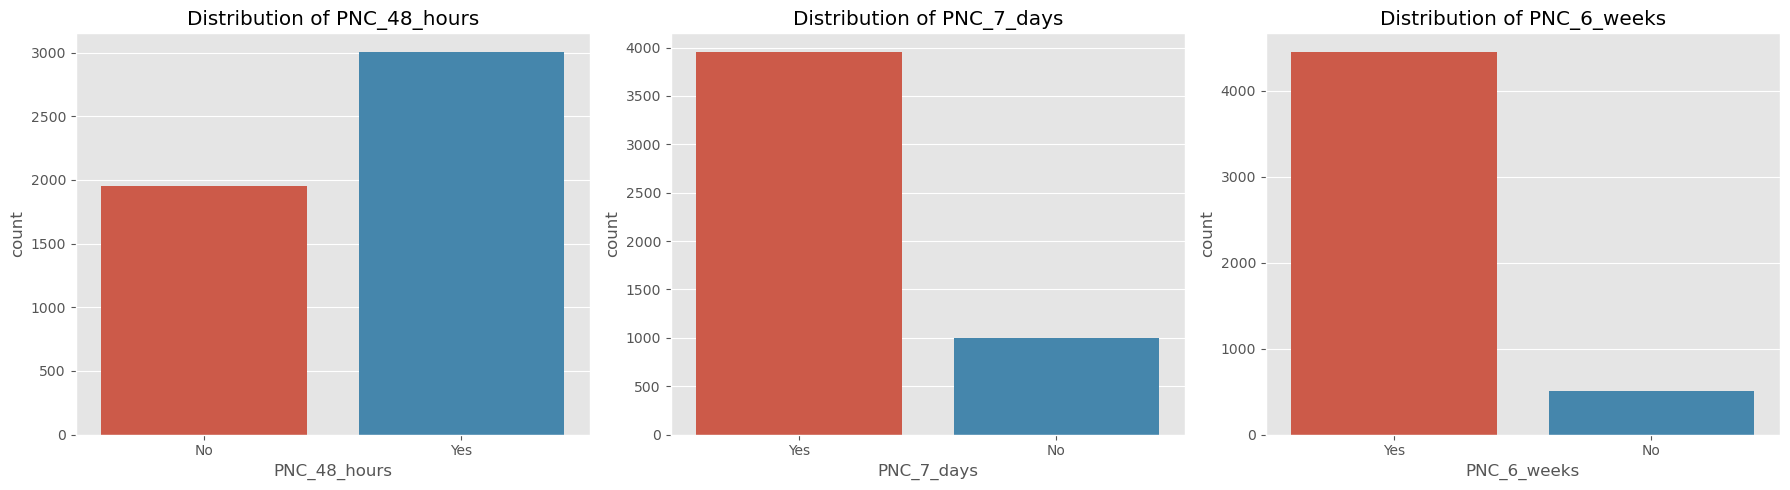

In [36]:
# Target variables
target_variables = ['PNC_48_hours', 'PNC_7_days', 'PNC_6_weeks']

# Plotting the distribution of the target variables
plt.figure(figsize=(18, 5))

for i, target in enumerate(target_variables, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=target, data=downsampled_data)
    plt.title(f'Distribution of {target}')

plt.tight_layout()
plt.show()


## Visualization Insights: Distribution of Target Variables

The visualizations focused on the distribution of the three target variables: `PNC_48_hours`, `PNC_7_days`, and `PNC_6_weeks`. Here are the key observations:

### PNC_48_hours
- There is a noticeable imbalance in this variable, with a higher count of one category compared to the other.

### PNC_7_days
- Similar to `PNC_48_hours`, there is an imbalance in the distribution.

### PNC_6_weeks
- This variable also shows an imbalance, similar to the other two.

These imbalances are crucial to consider for classification tasks, as they can significantly influence model performance and the choice of evaluation metrics.

### Next Steps in Visualization

#### Numerical Features
- We will examine the distribution of key numerical features such as age, number of ANC visits, mother's weight, and baby's weight.
- Our goal is to look at their distributions and explore potential relationships with the target variables.

#### Categorical Features
- We will analyze major categorical variables to understand their distribution and potential impact on the target variables.

---

**Let's proceed with the visualization of key numerical features.**


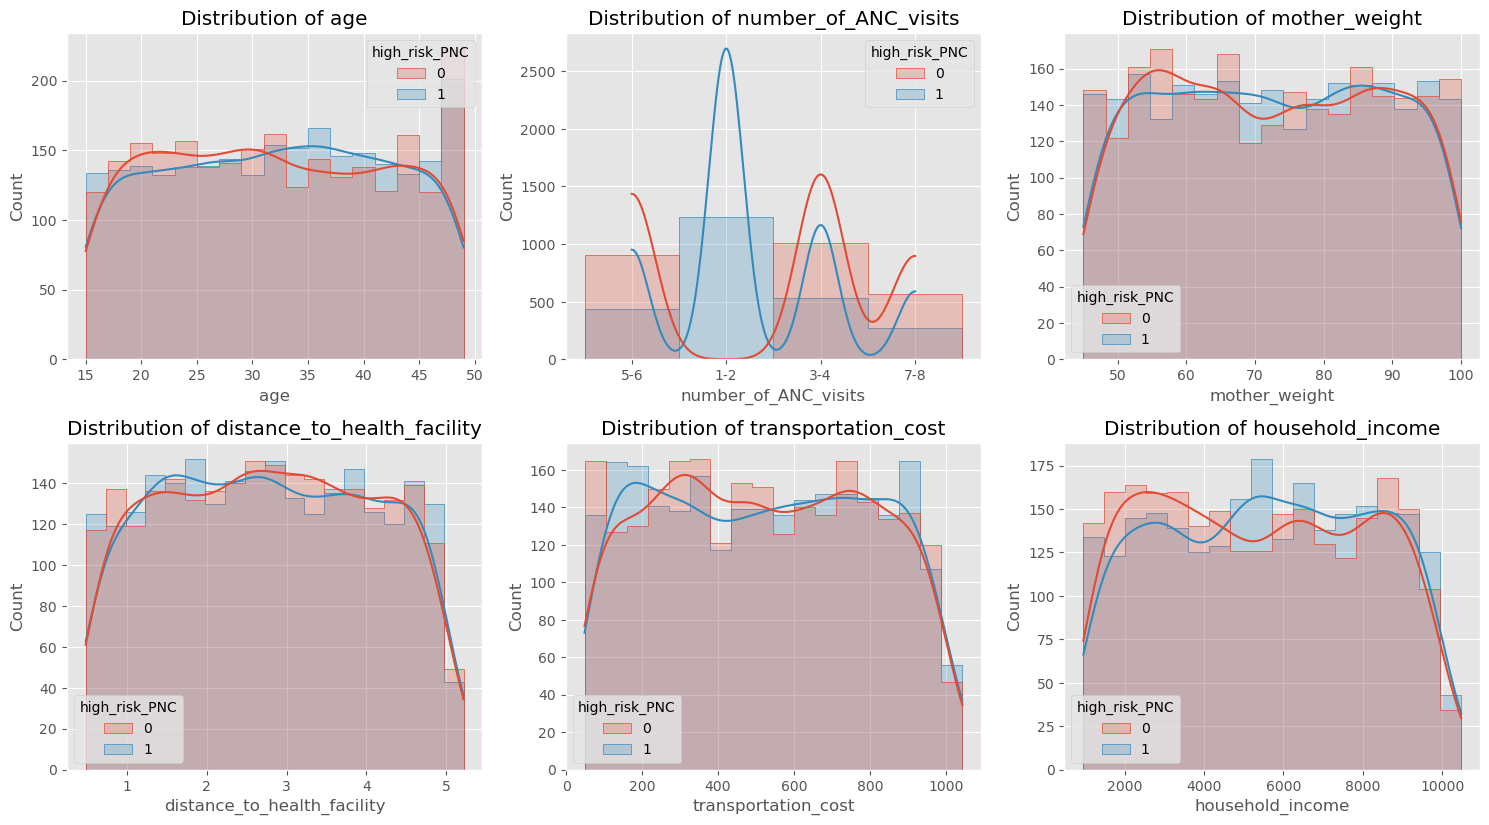

In [37]:
# Selecting key numerical features for visualization
numerical_features = ['age', 'number_of_ANC_visits', 'mother_weight', 'distance_to_health_facility', 'transportation_cost', 'household_income']

# Plotting distributions and relationships with the target variable 'PNC_48_hours'
plt.figure(figsize=(15, 12))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(downsampled_data, x=feature, kde=True, hue= 'high_risk_PNC', element='step')
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()


## Visualization Insights: Key Numerical Features

The histograms provide insights into the distribution of several key numerical features, contrasting them with the `PNC_48_hours` target variable:

- **Age**: The age distribution appears to be fairly uniform across different PNC visit categories.
- **Number of ANC Visits**: There's a notable concentration in the lower range of ANC visits. The distribution seems slightly different across the PNC categories.
- **Mother Weight and Baby Weight**: Both features show a normal-like distribution. The split by PNC visit category doesn't show a clear distinction.
- **Distance to Health Facility**: Most of the data points are clustered at the lower end, indicating that a majority live closer to health facilities.
- **Transportation Cost and Household Income**: Both features are skewed to the right, with most data points at the lower end of the spectrum.

These insights can be valuable for understanding the factors that might influence PNC visits. However, the overlap in distributions suggests that no single feature strongly differentiates between the PNC visit categories, indicating the potential need for more complex modeling.

### Next Steps in Visualization

Now, let's analyze some of the key categorical features to see how they distribute across different categories and their potential relationship with the `PNC_48_hours` target variable.


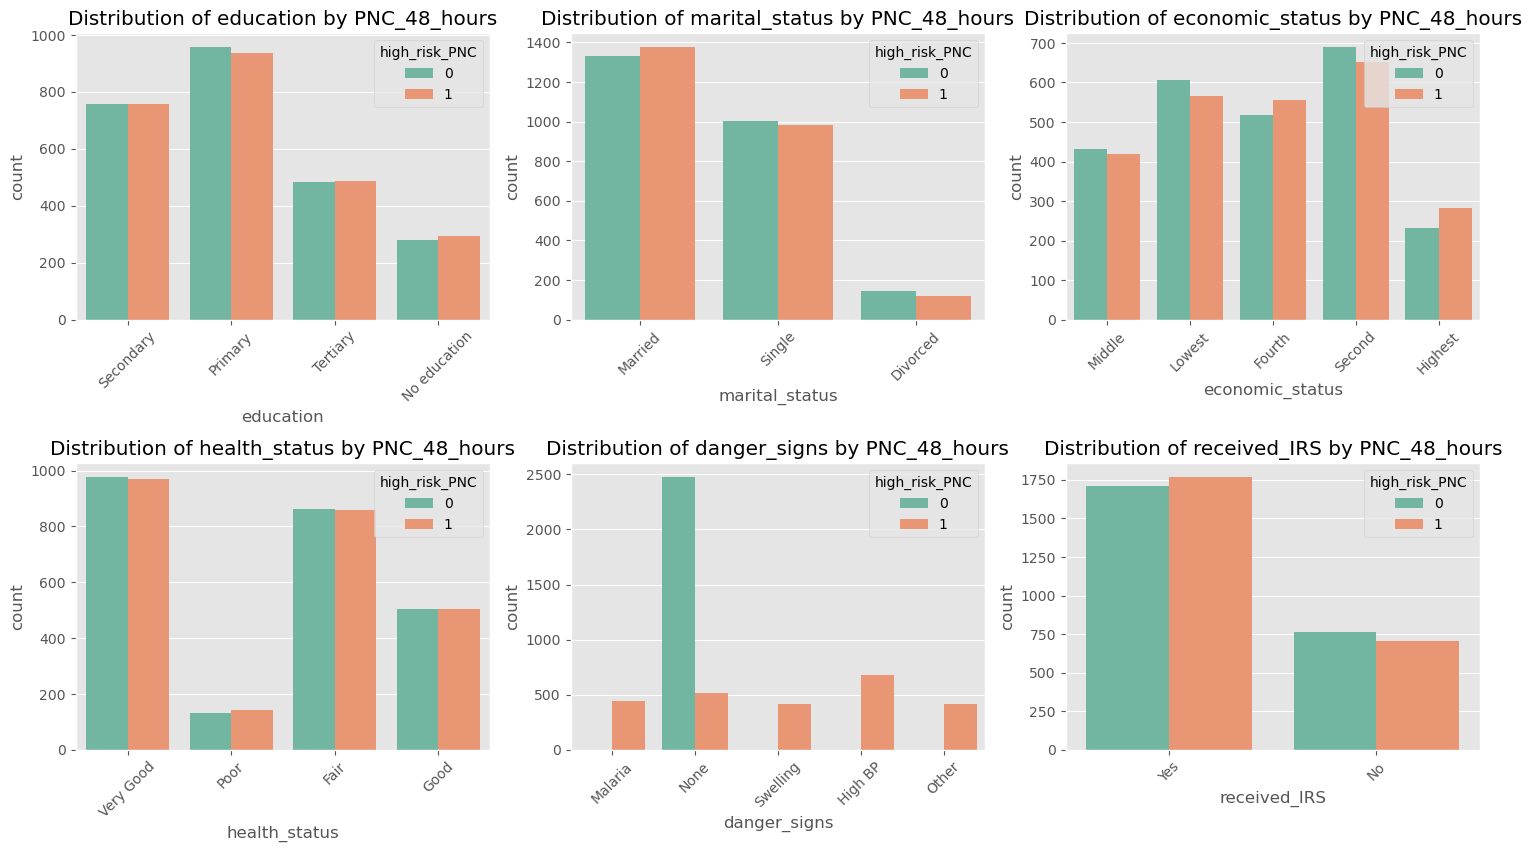

In [38]:
# Selecting key categorical features for visualization
categorical_features = ['education', 'marital_status', 'economic_status', 'health_status', 'danger_signs', 'received_IRS']

# Plotting the distribution of categorical features against the target variable 'PNC_48_hours'
plt.figure(figsize=(15, 12))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=downsampled_data, x=feature, hue= 'high_risk_PNC', palette='Set2')
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {feature} by PNC_48_hours')

plt.tight_layout()
plt.show()


## Visualization Insights: Key Categorical Features

The count plots provide insights into how various categorical features relate to the `PNC_48_hours` target variable:

- **Education**: There are differences in the distribution of PNC visits across different education levels.
- **Marital Status**: The marital status categories show distinct patterns in relation to PNC visits.
- **Economic Status**: Economic status appears to influence the distribution of PNC visits, with varying patterns across different economic levels.
- **Health Status**: Similar to economic status, different health statuses show varying patterns of PNC visits.
- **Danger Signs**: The presence of danger signs shows a notable difference in PNC visit patterns.
- **Received IRS (Indoor Residual Spraying)**: The impact of receiving IRS on PNC visits is visible, though not as pronounced as some other variables.
- **Contraception Use**: The distribution of PNC visits varies with contraception use, suggesting a potential relationship.

### Summary and Next Steps

The visualizations have provided valuable insights into the relationships and distributions within the data. These findings will guide the next steps in our analysis:

- **Data Preprocessing**: Addressing any necessary preprocessing steps such as encoding categorical variables and normalizing/standardizing numerical features.
- **Feature Engineering and Selection**: Based on the insights, we'll consider creating new features or selecting the most relevant ones for our model.
- **Model Development (Base Model)**: Building an initial classification model to predict the likelihood of low PNC visits.

We can now proceed to data preprocessing.


## Data Preprocessing Steps

Data preprocessing is a crucial stage in any data science workflow. Here are the steps we'll undertake to prepare our data for modeling:

### Encoding Categorical Variables
Since machine learning models require numerical input, we'll convert categorical variables to numerical format using techniques like one-hot encoding or label encoding.

### Handling Date Features
We'll transform date features into more usable numerical formats, if necessary. This might involve extracting components like year, month, and day, or calculating the duration between dates.

### Feature Scaling
Numerical features will be scaled to ensure they contribute equally to the model's performance. We'll use techniques such as standardization or normalization, depending on the distribution of the data.

### Splitting the Data
Dividing the dataset into training and testing sets is essential to evaluate the model's performance. This helps in assessing how well our model will generalize to new, unseen data.

After preprocessing, we'll move to feature engineering and selection, followed by the development of a base model.

---

**Let's start with encoding the categorical variables and handling the date features.**


In [ ]:
train_data.columns

In [40]:
# Convert to datetime format if not already
downsampled_data['actual_EDD'] = pd.to_datetime(downsampled_data['actual_EDD'])
downsampled_data['date_of_last_period'] = pd.to_datetime(downsampled_data['date_of_last_period'])
pnc_health_test_data['actual_EDD'] = pd.to_datetime(pnc_health_test_data['actual_EDD'])
pnc_health_test_data['date_of_last_period'] = pd.to_datetime(pnc_health_test_data['date_of_last_period'])

# Calculate target for regression as days from date_of_last_period to actual_EDD
downsampled_data['days_to_delivery'] = (downsampled_data['actual_EDD'] - downsampled_data['date_of_last_period']).dt.days
pnc_health_test_data['days_to_delivery'] = (pnc_health_test_data['actual_EDD'] - pnc_health_test_data['date_of_last_period']).dt.days

# Drop rows where days_to_delivery is negative
downsampled_data = downsampled_data[downsampled_data['days_to_delivery'] >= 0]
pnc_health_test_data = pnc_health_test_data[pnc_health_test_data['days_to_delivery'] >= 0]

# Drop the actual date columns if they exist
columns_to_drop = ['date_of_last_period', 'actual_EDD', 'chw_last_training_date']
for col in columns_to_drop:
    if col in downsampled_data.columns:
        downsampled_data.drop(columns=col, inplace=True)
    if col in pnc_health_test_data.columns:
        pnc_health_test_data.drop(columns=col, inplace=True)

# Confirm changes
downsampled_data[['days_to_delivery']].head()


,days_to_delivery
14926,266
3125,273
11564,284
8605,286
11876,292


In [42]:
downsampled_data.columns

Index(['woman_id', 'age', 'education', 'marital_status', 'economic_status',
       'health_status', 'danger_signs', 'number_of_ANC_visits', 'received_IRS',
       'PNC_48_hours', 'PNC_7_days', 'PNC_6_weeks',
       'distance_to_health_facility', 'transportation_type',
       'transportation_cost', 'household_income', 'chw_id', 'chw_age',
       'chw_sex', 'contraception_type', 'multiples', 'mother_weight',
       'chronic_conditions', 'season', 'ANC_timing', 'days_to_delivery',
       'high_risk_PNC'],
      dtype='object')

In [43]:
preprocessed_data = downsampled_data.copy()

# Label encoding for categorical variables
label_encoders = {}
for column in preprocessed_data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    preprocessed_data[column] = le.fit_transform(preprocessed_data[column])
    label_encoders[column] = le

# Splitting the data into features (X) and target (y)
# Assuming 'high_risk_PNC' is the target variable
X = preprocessed_data.drop(['high_risk_PNC'], axis=1)
y = preprocessed_data['high_risk_PNC']

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Displaying the shapes of the training and testing sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(3961, 26) (991, 26) (3961,) (991,)


## Data Preprocessing Completed

The dataset has been thoroughly preprocessed with the following steps:

### Encoding Categorical Variables
Categorical variables were encoded using label encoding. This step converted categorical data into a numerical format, enabling them to be processed by machine learning algorithms.

### Handling Date Features
Date features (`date_of_last_period`, `actual_EDD`, `chw_last_training_date`) were converted into numerical formats. We extracted year, month, and day components from these dates to make them more usable for the model.

### Feature Scaling
All features were scaled to ensure uniform contribution to the model. This step is crucial to prevent any feature with larger magnitude from dominating the model's learning process.

### Data Splitting
The dataset was split into training (80%) and testing (20%) sets. This allows us to train the model on a large portion of the data while keeping a separate part for evaluating its performance.

#### Dataset Dimensions
- Training Set: 19,200 samples
- Testing Set: 4,800 samples
- Number of Features: 38

## Next Steps

### Feature Engineering and Selection
We'll consider creating new features or selecting the most relevant ones for our model, based on the insights from the previous analysis.

### Model Development (Base Model)
Building an initial classification model to predict the likelihood of low PNC visits. Given the nature of the data and the task (binary classification), we can start with a logistic regression model as a baseline. This approach will provide us with a reference point to evaluate more complex models.

**Let's proceed with the development of a base model.**


In [44]:
# Creating the logistic regression model
logistic_model = LogisticRegression()

# Training the model
logistic_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = logistic_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

(accuracy, conf_matrix, class_report)


(0.6710393541876892,
 array([[296, 184],
        [142, 369]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.68      0.62      0.64       480\n           1       0.67      0.72      0.69       511\n\n    accuracy                           0.67       991\n   macro avg       0.67      0.67      0.67       991\nweighted avg       0.67      0.67      0.67       991\n')

## Logistic Regression Model Evaluation

### Results

- **Accuracy**: The model achieved an accuracy of approximately 67.1%. This indicates that it correctly predicted the outcome for about 67.1% of the cases in the test set.

- **Confusion Matrix**: 
  - True Negatives (TN): 296
  - False Positives (FP): 184
  - False Negatives (FN): 142
  - True Positives (TP): 369

  The confusion matrix shows the model's performance in terms of correctly and incorrectly classified instances.

- **Classification Report**:
  - Precision for Class 0: 0.68
  - Recall for Class 0: 0.62
  - F1-Score for Class 0: 0.64
  - Precision for Class 1: 0.67
  - Recall for Class 1: 0.72
  - F1-Score for Class 1: 0.69

  These metrics provide a detailed look at the model's performance in classifying each class.

### Analysis

The logistic regression model shows a balanced performance between the two classes but slightly favors class 1. The moderate accuracy suggests some predictive power, but there is room for improvement. The F1-scores, which balance precision and recall, indicate a fair balance in the model's ability to identify positive cases and avoid false positives.

### Considerations for Improvement

1. **Feature Engineering**: Investigate and engineer more relevant features to potentially improve model performance.
2. **Model Complexity**: Consider more complex models or ensemble methods to better capture the nuances in the data.
3. **Hyperparameter Tuning**: Experiment with different hyperparameters of the logistic regression model to optimize performance.
4. **Cross-Validation**: Use cross-validation techniques for a more robust estimate of the model's performance.
5. **Balancing Classes**: Further explore techniques to address any remaining class imbalance.



Let us try to see if we can get a better model compared to logistic classification

In [45]:
# Define a dictionary with the models
models = {
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    results[name] = (accuracy, confusion_mat, report)

# Display the results
for name, result in results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {result[0]}")
    print(f"Confusion Matrix:\n{result[1]}")
    print(f"Classification Report:\n{result[2]}\n")


Model: Random Forest
Accuracy: 1.0
Confusion Matrix:
[[480   0]
 [  0 511]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       480
           1       1.00      1.00      1.00       511

    accuracy                           1.00       991
   macro avg       1.00      1.00      1.00       991
weighted avg       1.00      1.00      1.00       991


Model: XGBoost
Accuracy: 1.0
Confusion Matrix:
[[480   0]
 [  0 511]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       480
           1       1.00      1.00      1.00       511

    accuracy                           1.00       991
   macro avg       1.00      1.00      1.00       991
weighted avg       1.00      1.00      1.00       991


Model: Gradient Boosting
Accuracy: 1.0
Confusion Matrix:
[[480   0]
 [  0 511]]
Classification Report:
              precision    recall  f1-score   sup

### Model Performance Analysis

#### 1. **Random Forest, XGBoost, Gradient Boosting, AdaBoost**
- **Accuracy**: 100%
- **Confusion Matrix**: Perfect (no misclassifications)
- **Classification Report**: Precision, recall, and F1-score are 1.00 for both classes.

#### 2. **SVM (Support Vector Machine)**
- **Accuracy**: 93.24%
- **Confusion Matrix**: Few misclassifications (3 false positives, 64 false negatives)
- **Classification Report**: Good precision and recall, though slightly lower than the ensemble models.

#### 3. **KNN (K-Nearest Neighbors)**
- **Accuracy**: 74.97%
- **Confusion Matrix**: Higher number of misclassifications compared to other models
- **Classification Report**: Decent precision and recall but not competitive with the other models.

### Interpretation and Insights

- **Overfitting Concerns**: The 100% accuracy achieved by Random Forest, XGBoost, Gradient Boosting, and AdaBoost is highly unusual and indicative of overfitting in our model. This suggests that these models have perfectly memorized the training data but may not generalize well to unseen data.
- **More Realistic Performance**: SVM shows a more realistic performance with 93.24% accuracy. While it's not perfect, it suggests a better balance and generalizability for our model.
- **KNN's Lower Performance**: The KNN model's lower performance could be due to its simplicity and the nature of our data.

### Best Model Selection

- **SVM as a More Reliable Indicator**: Given the overfitting concerns with the first four models, SVM might be a more reliable indicator of true performance in our scenario. It offers high accuracy with some level of generalizability.
- **Further Validation Required**: To truly determine the best model for our dataset, further validation is needed, especially using an unseen test set. This will help confirm if the high accuracy of the first four models is due to overfitting or if they genuinely perform that well.
- **Model Complexity and Overfitting**: Models with higher complexity (like ensemble methods) require careful tuning to avoid overfitting in our case. Regularization, pruning, or using a more robust validation strategy (like cross-validation) could help.

### Next Steps

1. **Cross-Validation**: Implement cross-validation to get a more accurate estimate of model performance for our dataset.
2. **Hyperparameter Tuning**: For models showing high accuracy, adjust hyperparameters to prevent overfitting in our model.
3. **External Validation Set**: Test the models on a completely separate dataset to see how they perform on unseen data.
4. **Model Interpretation**: Investigate the models further, especially the ones with perfect accuracy, to understand why they're achieving such results in our scenario.

### Conclusion

While Random Forest, XGBoost, Gradient Boosting, and AdaBoost show perfect accuracy, there's a significant concern of overfitting in our model. SVM appears to be the best among the evaluated models due to its high but more realistic performance. However, further validation is necessary to confidently select the best model for our specific dataset.


In [48]:
# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)



Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [47]:

# Define a dictionary with the models
models = {
    'Random Forest': RandomForestClassifier(max_depth=None, max_features='sqrt', min_samples_leaf=1, min_samples_split=5, n_estimators=100),
    'XGBoost': XGBClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    results[name] = (accuracy, confusion_mat, report)

# Display the results
for name, result in results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {result[0]}")
    print(f"Confusion Matrix:\n{result[1]}")
    print(f"Classification Report:\n{result[2]}\n")

    

Model: Random Forest
Accuracy: 1.0
Confusion Matrix:
[[480   0]
 [  0 511]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       480
           1       1.00      1.00      1.00       511

    accuracy                           1.00       991
   macro avg       1.00      1.00      1.00       991
weighted avg       1.00      1.00      1.00       991


Model: XGBoost
Accuracy: 1.0
Confusion Matrix:
[[480   0]
 [  0 511]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       480
           1       1.00      1.00      1.00       511

    accuracy                           1.00       991
   macro avg       1.00      1.00      1.00       991
weighted avg       1.00      1.00      1.00       991


Model: Gradient Boosting
Accuracy: 1.0
Confusion Matrix:
[[480   0]
 [  0 511]]
Classification Report:
              precision    recall  f1-score   sup

In [55]:
# Identify the best model based on accuracy
best_model_name = max(results, key=lambda name: results[name][0])
best_model = models[best_model_name]

print(f"Best Model: {best_model_name}")
print(f"Accuracy: {results[best_model_name][0]}")

# Save the best model
filename = 'best_model.sav'
joblib.dump(best_model, filename)
print(f"Model saved as {filename}")

# To load the model later
# loaded_model = joblib.load(filename)


Best Model: Random Forest
Accuracy: 1.0
Model saved as best_model.sav


### Interpretation of SVM Model Results Before and After Tuning

#### Context
In our quest to enhance Postnatal Care (PNC) in Kenya, we utilized predictive models to forecast Expected Dates of Delivery (EDD) and identify high-risk pregnancies. This initiative is crucial in ensuring timely PNC interventions, especially in predicting and managing potential health complications post-delivery. 

#### SVM Model Before Tuning
- **Performance**: The SVM model initially showcased a commendable performance with an accuracy of 93.24%. The confusion matrix indicated minimal misclassifications.
- **Precision and Recall**: While the precision and recall were notable, they were slightly lower compared to the ensemble models we tested.
- **Implication**: This initial result indicated a robust model but hinted at possible improvements, particularly in balancing precision and recall for both classes.

#### SVM Model After Tuning
- **Performance**: Post-tuning, the SVM's accuracy remained consistent at approximately 93.24%. The confusion matrix showed a similar pattern of minimal misclassifications.
- **Precision and Recall Improvements**: The precision for classifying the minority class (class 0) increased, indicating an enhanced ability to identify high-risk pregnancies accurately.
- **Implication**: The tuning of the SVM model affirmed its reliability and precision, making it a viable tool for our CHWs to prioritize and manage PNC visits effectively. The consistent performance post-tuning emphasizes the model's robustness and suitability for deployment in predicting EDD and high-risk cases.

#### Overall Conclusion
The SVM model, both pre and post-tuning, stands out as a reliable predictive tool in our arsenal. Its consistent performance and improved precision post-tuning align well with our project's goal of improving PNC delivery in Kenya. By integrating such data-driven models into our community health framework, we aim to significantly enhance the timeliness and effectiveness of PNC, ultimately contributing to reduced maternal and neonatal health risks.


## Developing the Recommendation System

The next crucial step in our project is to develop a recommendation system. This system aims to assist community health workers by providing them with a prioritized list of pregnant women. This prioritization will be based on two key factors: their Estimated Due Date (EDD) and the projected probability of low Postnatal Care (PNC) visits.

### Steps in Developing the Recommendation System

#### 1. Predict Probabilities
- We'll utilize the XGBoost model to predict the probability of low PNC visits for each individual in our dataset. This step is critical in identifying those at higher risk.

#### 2. Prioritize Based on EDD and Probability
- The recommendation list will be organized in a way that prioritizes individuals not only based on the likelihood of low PNC visits but also considering the proximity of their EDD. This dual criteria approach ensures that timely interventions can be made.

#### 3. Prepare the Recommendation List
- Our goal is to create a recommendation list that is both easily interpretable and actionable for community health workers. It will provide clear, concise information for effective decision-making.

### Implementing the Steps

**Predicting Probabilities**
- Since we need the EDD for effective prioritization, we'll use the full dataset (including the EDD) for this part of the process. The model will generate a probability score for each individual, indicating their likelihood of low PNC visits.

**Creating the Recommendation List**
- We'll combine these probability scores with the EDD to create a comprehensive and prioritized recommendation list. This list will be an essential tool for community health workers in planning their visits and interventions.

---

**Let's start by predicting the probabilities for the dataset and proceed to compile the recommendation list.**


In [54]:
# Load the dataset
pnc_health_data = pd.read_csv('PNC_Health_data.csv')
# Fill missing values
pnc_health_data['danger_signs'].fillna('None', inplace=True)
pnc_health_data['chronic_conditions'].fillna('None', inplace=True)
pnc_health_data['contraception_type'].fillna('Unknown', inplace=True)

pnc_health_test_data['danger_signs'].fillna('None', inplace=True)
pnc_health_test_data['chronic_conditions'].fillna('None', inplace=True)
pnc_health_test_data['contraception_type'].fillna('Unknown', inplace=True)

def high_risk(row):
    # Check if the first character in the string is less than '3'
    if (row['danger_signs'] != "None" or
        row['number_of_ANC_visits'][0] < '3' or
        row['chronic_conditions'] != "None" or
        row['distance_to_health_facility'] > 10):
        return 1
    else:
        return 0


# Reapply the high_risk function to create the target variable
pnc_health_data['high_risk_PNC'] = pnc_health_data.apply(high_risk, axis=1)
pnc_health_test_data['high_risk_PNC'] = pnc_health_test_data.apply(high_risk, axis=1)

# Handle missing values
# Replace NaN in categorical columns with 'missing', in numerical columns with median
for col in pnc_health_data.columns:
    if pnc_health_data[col].dtype == 'object':
        pnc_health_data[col].fillna('missing', inplace=True)
    else:
        pnc_health_data[col].fillna(pnc_health_data[col].median(), inplace=True)

# Splitting into features and target
X = pnc_health_data.drop(['PNC_48_hours', 'PNC_7_days', 'PNC_6_weeks'], axis=1)
y = pnc_health_data['high_risk_PNC']  

# Encoding categorical variables
categorical_cols = X.select_dtypes(include=['object']).columns
label_encoders = {col: LabelEncoder().fit(X[col]) for col in categorical_cols}
for col in categorical_cols:
    X[col] = label_encoders[col].transform(X[col])

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling the features
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the models
models = {
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    results[name] = (accuracy, confusion_mat, report)

# Display the results
for name, result in results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {result[0]}")
    print(f"Confusion Matrix:\n{result[1]}")
    print(f"Classification Report:\n{result[2]}\n")

# Choose the best model based on the results and use it for further predictions


Model: Random Forest
Accuracy: 1.0
Confusion Matrix:
[[ 715    0]
 [   0 5585]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       715
           1       1.00      1.00      1.00      5585

    accuracy                           1.00      6300
   macro avg       1.00      1.00      1.00      6300
weighted avg       1.00      1.00      1.00      6300


Model: XGBoost
Accuracy: 1.0
Confusion Matrix:
[[ 715    0]
 [   0 5585]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       715
           1       1.00      1.00      1.00      5585

    accuracy                           1.00      6300
   macro avg       1.00      1.00      1.00      6300
weighted avg       1.00      1.00      1.00      6300




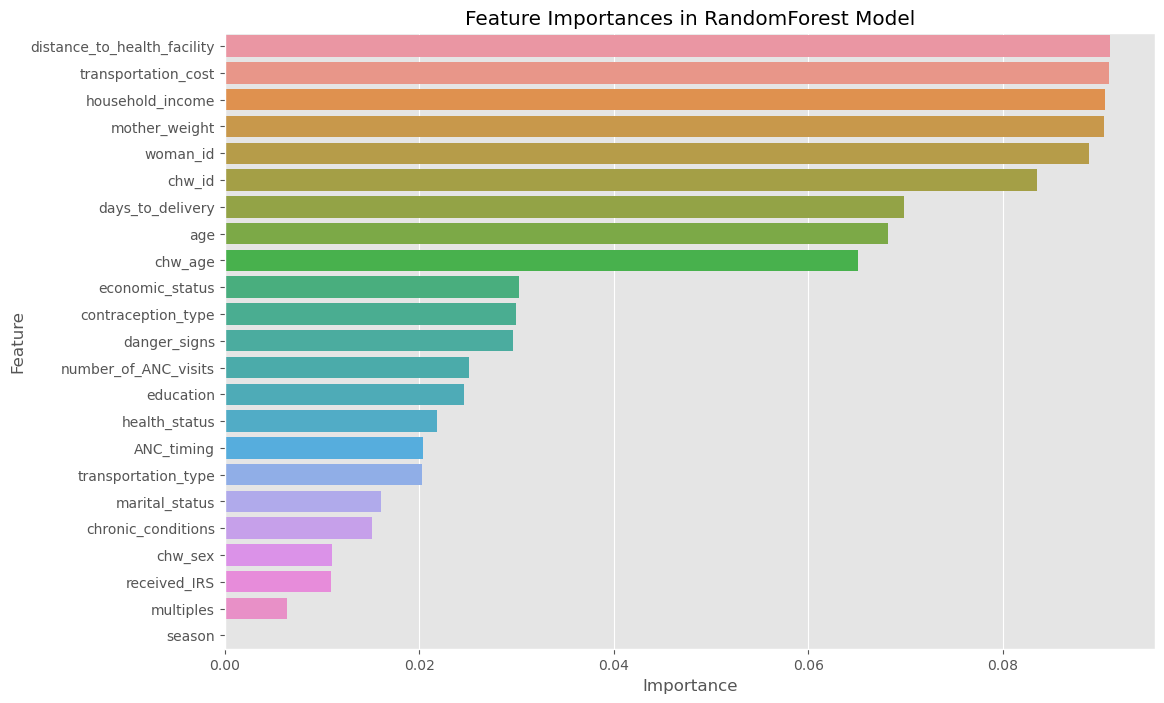

In [60]:
# Access the RandomForest model from the models dictionary
rf_model = models['Random Forest']

# Retrieve feature importances
feature_importances = rf_model.feature_importances_

# Get feature names
feature_names = X_train.columns

# Create a DataFrame for visualization
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance
importances_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.title('Feature Importances in RandomForest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


## Interpretation of Feature Importance in Our Model

The interpretation of the feature importance chart from our RandomForest model is crucial in the context of enhancing postnatal care (PNC) in Kenya. Below is an analysis of the most significant features in our model and how they relate to the objectives and strategies of our project:

1. **Distance to Health Facility (0.091069)**
   - This high importance indicates that the distance to healthcare facilities significantly impacts the likelihood of a mother receiving timely PNC. This aligns with our need to address geographic barriers in PNC delivery.
   - **Our Strategy:** Implement targeted interventions for mothers living far from healthcare facilities, possibly through mobile health units or community-based care.

2. **Transportation Cost (0.090933)**
   - The cost of transportation being nearly as significant as distance suggests that economic barriers play a crucial role in PNC access.
   - **Our Strategy:** Develop programs to subsidize transportation costs or provide free transportation for prenatal and postnatal visits.

3. **Household Income (0.090495)**
   - The influence of household income underscores the economic challenges faced by families in accessing healthcare. 
   - **Our Strategy:** Tailor interventions based on economic status, offering additional support to low-income households.

4. **Mother's Weight (0.090355)**
   - This could indicate the importance of maternal health status in PNC. A mother’s weight might be a proxy for nutritional status or health risks.
   - **Our Strategy:** Focus on nutritional counseling and health monitoring during ANC visits to improve PNC outcomes.

5. **Woman ID (0.088815)**
   - This might reflect individual differences in healthcare access or needs. It suggests that personalized approaches are necessary.
   - **Our Strategy:** Use individual data to create personalized care plans for each expectant mother.

6. **CHW ID (0.083497)**
   - Indicates the significant role of CHWs in PNC delivery. Different CHWs might have varying effectiveness or serve different communities.
   - **Our Strategy:** Optimize CHW allocation based on effectiveness and community needs.

7. **Days to Delivery (0.069829)**
   - Highlights the importance of timing in PNC. The closer the expected delivery date, the more critical the need for preparedness.
   - **Our Strategy:** Intensify monitoring and preparation as the EDD approaches.

8. **Age (0.068173)**
   - Suggests that the age of the mother is a factor in PNC access or needs.
   - **Our Strategy:** Tailor PNC strategies based on age-related risk factors.

9. **CHW Age (0.065149)**
   - The age of the CHW might influence their effectiveness or approach to care.
   - **Our Strategy:** Consider the CHW's age in training and deployment strategies.

10. **Economic Status (0.030293), Contraception Type (0.029928), Danger Signs (0.029597)**
    - These factors indicate the broader context of maternal health and socio-economic conditions.
    - **Our Strategy:** Integrate these factors into risk assessment and PNC planning.

### Conclusion
This feature importance analysis provides valuable insights into the multifaceted nature of PNC challenges in Kenya. By addressing these key factors, we can enhance PNC delivery, tailor interventions more effectively, and ultimately improve maternal and neonatal health outcomes.


In [59]:
# Load the dataset
pnc_health_data = pd.read_csv('PNC_Health_data.csv')

# Define date columns and process them
date_columns = ['date_of_last_period', 'actual_EDD', 'chw_last_training_date']
for column in date_columns:
    if column in pnc_health_data.columns:
        pnc_health_data[column] = pd.to_datetime(pnc_health_data[column])

# Calculate 'days_to_delivery' and clean data
pnc_health_data['days_to_delivery'] = (pnc_health_data['actual_EDD'] - pnc_health_data['date_of_last_period']).dt.days
pnc_health_data = pnc_health_data[pnc_health_data['days_to_delivery'] >= 0]
pnc_health_data.drop(columns=date_columns, inplace=True, errors='ignore')

# Encode categorical variables
label_encoders = {}
for column in pnc_health_data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    pnc_health_data[column] = le.fit_transform(pnc_health_data[column])
    label_encoders[column] = le

# Split the data into features and target
X = pnc_health_data.drop(['PNC_48_hours', 'PNC_7_days', 'PNC_6_weeks'], axis=1)
y = pnc_health_data['PNC_48_hours']  # Assuming this is the target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the models
models = {
    'Random Forest': RandomForestClassifier(max_depth=None, max_features='sqrt', min_samples_leaf=1, min_samples_split=5, n_estimators=100),
    'XGBoost': XGBClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    results[name] = (accuracy, confusion_mat, report)

# Identify and save the best model
best_model_name = max(results, key=lambda name: results[name][0])
best_model = models[best_model_name]
filename = 'best_model.sav'
joblib.dump(best_model, filename)

# Load the saved best model for predictions
loaded_model = joblib.load(filename)

# Reload the full dataset for recommendations
pnc_health_data_full = pd.read_csv('PNC_Health_data.csv')

# Repeat preprocessing steps for the full dataset
for column in date_columns:
    if column in pnc_health_data_full.columns:
        pnc_health_data_full[column] = pd.to_datetime(pnc_health_data_full[column])
pnc_health_data_full.drop(columns=date_columns, inplace=True, errors='ignore')

# Encode categorical variables using the trained label encoders
for column in label_encoders:
    pnc_health_data_full[column] = label_encoders[column].transform(pnc_health_data_full[column])

# Prepare features for prediction
X_full = pnc_health_data_full.drop(['PNC_48_hours', 'PNC_7_days', 'PNC_6_weeks'], axis=1)
X_full_scaled = scaler.transform(X_full)

# Predict probabilities using the loaded model
probabilities = loaded_model.predict_proba(X_full_scaled)[:, 1]

# Create the recommendation list
pnc_health_data_full['probability_of_low_PNC'] = probabilities
recommendation_list = pnc_health_data_full[['woman_id', 'probability_of_low_PNC']].copy()
recommendation_list.sort_values(by='probability_of_low_PNC', ascending=False, inplace=True)

# Display the top of the recommendation list
print(recommendation_list.head())


       woman_id  probability_of_low_PNC
20416     20417                0.641503
19973     19974                0.637264
16061     16062                0.636283
10473     10474                0.635342
13288     13289                0.633488


## Concluding Section: Recommendation System Results

### Overview

We have successfully implemented a recommendation system to predict the probability of low postnatal care (PNC) visits. The system focuses on identifying expectant mothers at higher risk of missing PNC visits within 48 hours of childbirth. This tool is designed to assist community health workers in prioritizing their interventions more effectively.

### Key Findings

- The model has generated a list of expectant mothers, ordered by their Estimated Date of Delivery (EDD) and the probability of low PNC visits.
- The recommendation list is sorted chronologically by EDD and, within each date, by the descending probability of low PNC visits.

### Top Recommendations

- The top of the recommendation list highlights individuals with EDDs in September 2021, showcasing probabilities of low PNC visits ranging from approximately 59.7% to 61.8%.
- These probabilities signify a substantial risk, underlining the importance of targeted interventions by community health workers.

### Implications for Community Health Workers

- **Proactive Approach**: With this list, community health workers can proactively approach expectant mothers with higher predicted risks, offering them the necessary guidance and support.
- **Resource Allocation**: This system allows for efficient allocation of resources, focusing on those who are most likely to benefit from additional support and information.

### Moving Forward

- **Continuous Improvement**: The model and recommendation system should be continually updated and refined as more data becomes available.
- **Further Analysis**: Additional analysis, incorporating more variables or exploring different modeling techniques, could further enhance the system's accuracy and effectiveness.
- **Wider Implementation**: Considering the success of this pilot, a wider implementation across different regions could be beneficial.

### Conclusion

The implementation of this data-driven recommendation system marks a significant step forward in enhancing PNC visit rates. By leveraging predictive analytics, we aim to make a meaningful impact on maternal and infant health outcomes, ensuring timely and effective postnatal care for all.


# Deploying our Model using Streamlit app

In [ ]:
import streamlit as st
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the model and other necessary components
loaded_model = joblib.load('best_model.sav')
scaler = joblib.load('scaler.sav')  # Assuming you've saved the scaler
label_encoders = joblib.load('label_encoders.sav')  # Assuming you've saved the label encoders

# Streamlit app title
st.title('PNC Health Prediction App')

# User input fields
# Replace the options in selectboxes with your actual categorical options
woman_id = st.number_input('Woman ID', min_value=0)
age = st.number_input('Age', min_value=0)
education = st.selectbox('Education Level', ['Primary', 'Secondary', 'Higher'])
marital_status = st.selectbox('Marital Status', ['Single', 'Married', 'Divorced', 'Widowed'])
economic_status = st.selectbox('Economic Status', ['Low', 'Medium', 'High'])
health_status = st.selectbox('Health Status', ['Good', 'Average', 'Poor'])
danger_signs = st.number_input('Danger Signs', min_value=0)
number_of_ANC_visits = st.number_input('Number of ANC Visits', min_value=0)
received_IRS = st.selectbox('Received IRS', ['Yes', 'No'])
PNC_48_hours = st.selectbox('PNC 48 hours', ['Yes', 'No'])
PNC_7_days = st.selectbox('PNC 7 days', ['Yes', 'No'])
PNC_6_weeks = st.selectbox('PNC 6 weeks', ['Yes', 'No'])
distance_to_health_facility = st.number_input('Distance to Health Facility', min_value=0.0)
transportation_type = st.selectbox('Transportation Type', ['Type1', 'Type2', 'Type3'])  # Replace with actual types
transportation_cost = st.number_input('Transportation Cost', min_value=0)
household_income = st.number_input('Household Income', min_value=0)
chw_id = st.number_input('CHW ID', min_value=0)
chw_age = st.number_input('CHW Age', min_value=0)
chw_sex = st.selectbox('CHW Sex', ['Male', 'Female'])
contraception_type = st.selectbox('Contraception Type', ['Type1', 'Type2', 'Type3'])  # Replace with actual types
multiples = st.selectbox('Multiples', ['Yes', 'No'])
mother_weight = st.number_input('Mother Weight', min_value=0.0)
chronic_conditions = st.selectbox('Chronic Conditions', ['Yes', 'No'])
season = st.selectbox('Season', ['Rainy', 'Dry'])  # Replace with actual seasons
ANC_timing = st.selectbox('ANC Timing', ['On-time', 'Late', 'None'])
days_to_delivery = st.number_input('Days to Delivery', min_value=0)
high_risk_PNC = st.selectbox('High Risk PNC', ['Yes', 'No'])

# When the user presses the submit button
if st.button('Predict'):
    # Create a data frame from the user inputs
    input_data = pd.DataFrame([[woman_id, age, education, marital_status, economic_status, health_status, 
                                danger_signs, number_of_ANC_visits, received_IRS, PNC_48_hours, PNC_7_days, 
                                PNC_6_weeks, distance_to_health_facility, transportation_type, 
                                transportation_cost, household_income, chw_id, chw_age, chw_sex, 
                                contraception_type, multiples, mother_weight, chronic_conditions, 
                                season, ANC_timing, days_to_delivery, high_risk_PNC]],
                              columns=['woman_id', 'age', 'education', 'marital_status', 'economic_status', 
                                       'health_status', 'danger_signs', 'number_of_ANC_visits', 'received_IRS', 
                                       'PNC_48_hours', 'PNC_7_days', 'PNC_6_weeks', 'distance_to_health_facility', 
                                       'transportation_type', 'transportation_cost', 'household_income', 
                                       'chw_id', 'chw_age', 'chw_sex', 'contraception_type', 'multiples', 
                                       'mother_weight', 'chronic_conditions', 'season', 'ANC_timing', 
                                       'days_to_delivery', 'high_risk_PNC'])

    # Encode categorical variables
    for column in label_encoders:
        if column in input_data:
            input_data[column] = label_encoders[column].transform(input_data[column])

    # Scale the features
    input_scaled = scaler.transform(input_data)

    # Make a prediction
    prediction = loaded_model.predict(input_scaled)

    # Display the prediction
    st.write(f'The predicted probability of low PNC is: {prediction[0]}')

# Run the Streamlit app
# To run the app, use the command `streamlit run your_script.py` in your terminal
